In [63]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [64]:
folder = "../Lane_Detection/test_images"
img_dir = os.listdir(folder)


on single image

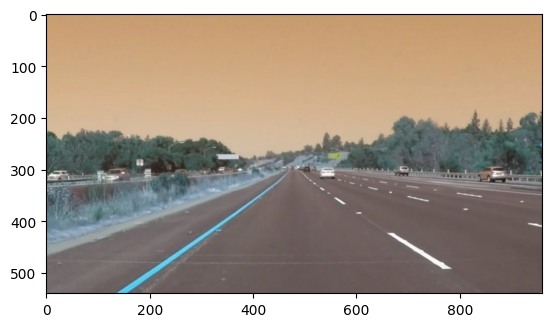

In [65]:
image = cv2.imread(folder + "/" + img_dir[4])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

blur = cv2.blur(gray, ksize=(3, 3))

edges = cv2.Canny(blur, threshold1=100, threshold2=150)
plt.imshow(image)


create mask

In [66]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


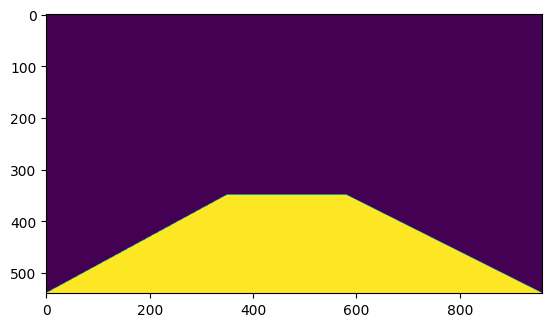

In [67]:
# CREATE A MASKED IMAGE OF OUR CANNY FILTER OUTPUT IMAGE'edges' 
mask = np.zeros_like(edges)   
ignore_mask_color = 255   
# Defining a four-sided polygon region to mask, using full length of bottom of image and \top verticies are defined to capture lanes in distance
vertices = np.array([[(0,image.shape[0]),(350, 350), (580,350), (image.shape[1],image.shape[0])]], dtype=np.int32)
masked_edges = cv2.fillPoly(mask, vertices, ignore_mask_color) # retain information only in the region of interest

masked_edges = region_of_interest(edges, vertices)

plt.imshow(mask)


hough transform

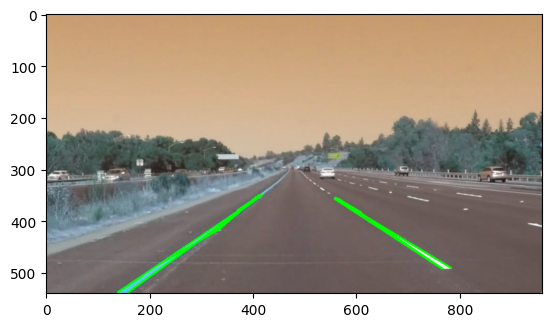

In [68]:
# DEFINE PARAMETERS FOR HOUGH TRANSFORM
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 20 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 25 # minimum number of pixels making up a line
max_line_gap = 100 # maximum gap in pixels between connectable line segments

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), minLineLength=min_line_length, maxLineGap=max_line_gap)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(image)

test on video

In [70]:
video_path = "D:/Python/Infantry/Lane_Detection/test_videos/challenge.mp4"

cap = cv2.VideoCapture(video_path)

# Check if the video file is successfully opened
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Read and display each frame of the video
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if the frame is successfully read
    if not ret:
        print("End of video.")
        break

    # Display the frame
    cv2.imshow('Video', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video capture object and close the OpenCV window
cap.release()
cv2.destroyAllWindows()

End of video.
